<a href="https://colab.research.google.com/github/minhyeok2001/Computer-Vision/blob/main/kannada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_file_path = '/content/drive/MyDrive/Kannada-MNIST/train.csv'
test_file_path = '/content/drive/MyDrive/Kannada-MNIST/test.csv'

In [ ]:
import pandas as pd

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [ ]:
print(train_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          0       0       0       0       0       0       0       0       0   
1          1       0       0       0       0       0       0       0       0   
2          2       0       0       0       0       0       0       0       0   
3          3       0       0       0       0       0       0       0       0   
4          4       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      5       0       0       0       0       0       0       0       0   
59996      6       0       0       0       0       0       0       0       0   
59997      7       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   6 255 255   6   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  19 255 236 236 255   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255 255   0   0 223  32   0   0   0   

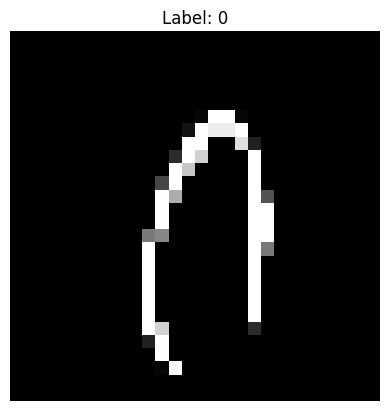

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임에서 첫 번째 행의 픽셀 값 추출
first_image = train_data.iloc[1, 1:].values  # 1번째부터 픽셀 값
label = train_data.iloc[0, 0]  # 라벨 값

print(first_image)

# 28x28로 변환
first_image = first_image.reshape(28, 28)

# 이미지 출력
plt.imshow(first_image, cmap='gray')
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()

In [ ]:
import torch

train_images = []
train_labels = []

# 각 행에서 데이터를 추출
for idx in range(len(train_data)):
    # 라벨 추출
    label = train_data.iloc[idx,0]
    train_labels.append(label)

    # 픽셀 데이터 추출
    pixels = train_data.iloc[idx,1:].values.reshape((1, 28, 28))
    train_images.append(pixels)


train_images = torch.tensor(train_images, dtype=torch.float32)  # 이미지는 float32 텐서로 변환
train_labels = torch.tensor(train_labels, dtype=torch.long)    # 라벨은 long 텐서로 변환

In [ ]:
print(train_images.shape)

torch.Size([60000, 28, 28, 1])


In [ ]:
train_set = torch.utils.data.TensorDataset(train_images, train_labels)

In [ ]:
print(train_set[0][0].shape)

torch.Size([1, 28, 28])


In [ ]:
test_images = []
test_labels = []

for idx in range(len(test_data)):
    # 라벨 추출
    label = test_data.iloc[idx,0]
    test_labels.append(label)

    pixels = test_data.iloc[idx,1:].values.reshape((1, 28, 28))
    test_images.append(pixels)


test_images = torch.tensor(train_images, dtype=torch.float32)  # 이미지는 float32 텐서로 변
test_labels = torch.tensor(train_labels, dtype=torch.long)    # 라벨은 long 텐서로 변환

<ipython-input-77-9fbed78e3bdd>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_images = torch.tensor(train_images, dtype=torch.float32)  # 이미지는 float32 텐서로 변
<ipython-input-77-9fbed78e3bdd>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(train_labels, dtype=torch.long)    # 라벨은 long 텐서로 변환


In [ ]:
test_set = torch.utils.data.TensorDataset(test_images, test_labels)

<< 사용자 데이터셋 정의 ( NO TensorDataset )>>

In [ ]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.RandomRotation(10),  # -10도 ~ 10도 사이로 랜덤 회전
    transforms.RandomHorizontalFlip(),  # 랜덤 좌우 반전
])

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self, images, labels, transform) :
    self.images = images
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    image = self.images[idx]
    label = self.labels[idx]

    if self.transform :
      image = self.transform(image)

    return image, label


In [ ]:
train_set = CustomDataset(train_images, train_labels, transform=transform)

In [ ]:
import torch

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

	•	PyTorch는 CNN 입력 데이터를 (C, H, W) 또는 (N, C, H, W) 형식으로 처리합니다.
	•	현재 데이터는 (N, H, W, C) 형태로 저장된 것으로 보이며, 이를 (N, C, H, W)로 변환해야 합니다.

데이터 로더에 넣었으니 이제 모델 제작

인풋은 28x28 1차원.

In [ ]:
import torch.nn as nn
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.k1 = nn.Conv2d(1,16,kernel_size=3,padding=1)
    self.k2 = nn.Conv2d(16,8,kernel_size=3)
    self.k3 = nn.Conv2d(8,4,kernel_size=2)
    self.fc = nn.Linear(4*2*2,10)
    self.pool = nn.AvgPool2d(2,2)
    self.act = nn.ReLU()
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = self.k1(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.k2(x)
    x = self.act(x)
    x = self.pool(x)

    x = self.k3(x)
    x = self.act(x)
    x = self.pool(x)

    x = x.view(x.size(0),-1)
    x = self.fc(x)
    return x

In [ ]:
model = CNN()
model.train()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
  for input, labels in train_loader:
      y = model(input)
      loss = loss_fn(y,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [ ]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for input, labels in test_loader:
    outputs = model(input)
    predictions = torch.argmax(outputs,dim=1)
    correct += (predictions == labels).sum().item() # 그냥 sum만 하면 텐서꼴로 나옴. 이걸 숫자로 바꾸기 위해서 item 사용
    total +=labels.size(0)


print(f'accuracy: {correct/total}')

accuracy: 0.9456166666666667


In [ ]:
import pandas as pd

# 예측 결과를 DataFrame으로 생성
submission = pd.DataFrame({
    'id': test_ids,        # 테스트 데이터의 ID
    'label': predictions   # 모델의 예측 결과
})

# CSV 파일로 저장
submission.to_csv('submission.csv', index=False)